<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/twyncoder/tf-handson-tcb/blob/main/L03_TrainDNN2_clasificacionBinaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Redes de Aprendizaje Profundo básicas con Keras y Tensorflow.
## *Deep Neural Networks (DNN) para clasificación binaria*

## 0. Preparación del entorno y comprobación de requisitos

In [1]:
# Common imports
import os
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
from tensorflow import keras

# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_name, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_name + "." + fig_extension)
    print("Saving figure", fig_name)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

def print_history(history,title=None, extension='png'):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    #plt.gca().set_ylim(0, 1)
    plt.xlabel("epochs")
    if(title!=None):
        plt.title(title)
        save_fig(title,fig_extension=extension)

### Información de versiones

In [2]:
tf.__version__

'2.10.1'

### Comprobar si disponemos de una GPU

In [3]:
tf.config.list_physical_devices('GPU')

[]

## 1. Dataset

In [11]:
from numpy import load
data = load('pneumoniamnist.npz')
X_train = data['train_images']
X_valid = data['val_images']
X_test = data['test_images']
Y_train = data['train_labels'][:,0]
Y_valid = data['val_labels'][:,0]
Y_test = data['test_labels'][:,0]

In [12]:
labels = ["normal", "pneumonia"]

**¡AHORA TÚ!**
- ¿Cuántas imágenes hay disponibles para train, validación y test?
- ¿Cómo son las etiquetas (valores escalares o _one-hot encoding_)?
- Escribe una función en Python `def show_example(x,y)`, que facilite mostrar una imagen y su etiqueta verdadera de acuerdo a la lista `labels`. Deberá poder invocarse como se indica en la celda de más abajo. Una vez definida la función muestra una imagen del set de train y una del set de validación. 
- Repasa el notebook de la sesión anterior y averigua si tenemos que hacer algún otro paso importante con el dataset

In [13]:
#TODO

In [14]:
# ...
# N = 5
# show_example(X_train[N],Y_train[N])

## 2. Entrenamiento

En cuadernos anteriores hemos estado trabajando con redes neuronales para clasificación multiclase. En la siguiente figura se indica qué características tienen las redes neuronales para problemas de clasificación binaria, como el que nos encontramos. Más específicamente:
- Se coloca una única neurona en la capa de salida y **para esa neurona** se utiliza una función de activación _logística_ o _sigmoid_.
- ¿Qué valores pueden entonces tomar las salidas de la red neuronal? ¿Cómo podremos saber qué clase ha sido la inferida por la red a partir de la activación obtenida en la última neurona?

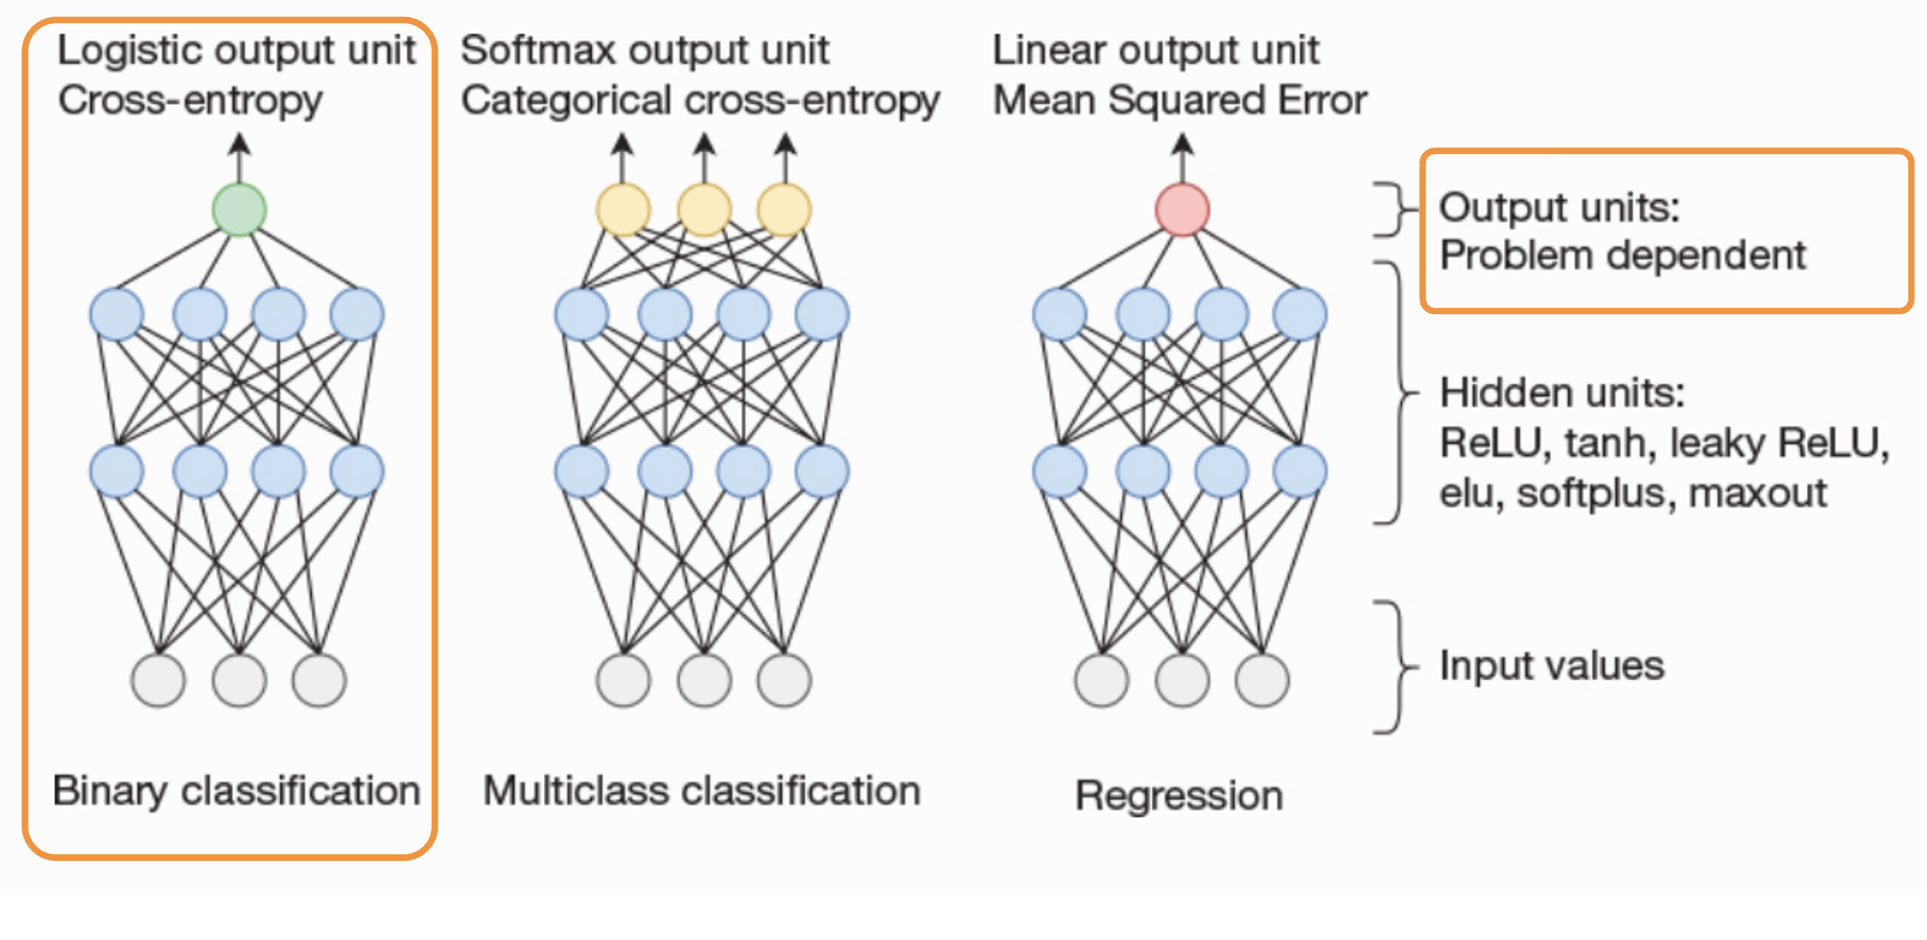

**¡AHORA TÚ!**

- Teniendo en cuenta los comentarios anteriores, escribe en keras la definición de una red de aprendizaje profundo con capas fully-connected, que permita clasificar las imágenes del dataset. 
- En cualquier caso, asegúrate de que en tu red neuronal el número de capas no puede ser inferior a 5 y el número máximo de parámetros para entrenar la red no puede ser superior a 250.000.

In [21]:
#TODO

**¡AHORA TÚ!** 
- En este tipo de problemas de clasificación binaria es posible utilizar para el cálculo del _loss_ `binary_crossentropy` en Keras. Compila la red anterior asegurándote de elegir bien la función necesaria para el cálculo del _loss_
- Utilizando algún optimizador distinto de _sgd_
- (Opcionalmente) especificando un learning rate inicial.



In [23]:
#TODO MODEL COMPILE

### Model Checkpoint
Durante el entrenamiento es posible controlar la evolución de las métricas (`val_accuracy`, `val_loss`) y salvar únicamente los parámetros de la red después de aquella  epoch en la que se obtienen los mejores resultados. 
Para ello hay que configurar una función de _callback_ (cb) y pasarla como argumento a la función `fit()` 

In [25]:
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("pneumonia.h5", monitor='val_accuracy', mode='max',save_best_only=True)

**¡AHORA TÚ!** 
- Completa la llamada a `fit()` de más abajo sustituyendo donde pone `<<<FIXME>>>`. Observa que puedes jugar con el tamaño del _batch_ y el número de _epochs_.
- Entrena la red y muestra en una gráfica la evolución del entrenamiento.

In [ ]:
#TODO MODEL TRAIN
history1 = model.fit(X_train, Y_train, epochs=<<<FIXME>>>,
                    validation_data=(X_valid, Y_valid),
                    batch_size = <<<FIXME>>>,
                    callbacks=[model_checkpoint_cb])

# 3. Test
## Haciendo predicciones

**¡AHORA TÚ!**
- Utiliza una función de keras para **evaluar** el modelo sobre todo el set de test (obtener un valor de _loss_ y de _test_acc_)
- Utiliza una función de keras para **predecir** o generar la salida de la red neuronal para un conjunto de 10 imágenes de test. Añade una operación en Python que te permita saber a qué clase pertenecen cada una de esas predicciones.
- Escribe una función que para una imagen de test muestre su imagen, la etiqueta verdadera y la predicción y ejecuta el código anterior sobre dos imágenes de test




In [24]:
#TODO

In [ ]:
# ...

In [ ]:
# N=60
# show_prediction(X_test_orig[N],X_mean,X_std,Y_test[N])

In [ ]:
# N=780
# show_prediction(X_test_orig[N],X_mean,X_std,Y_test[N])

In [ ]:
# CUT CELLS WITH SOLUTIONS BELOW 